In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import datetime 
import calendar 


%matplotlib inline 



In [2]:

df = pd.read_csv('/root/Downloads/kcoach_2015.csv')

In [3]:
df.head()

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,"2015-05-03,19:09:22",Unnamed: 10,Unnamed: 11
0,4,\N,RUBAVU-KIGALI,05h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:12:39",NaN,NaN
1,5,NaN,RUBAVU-KIGALI,06h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:14:09",NaN,NaN
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49",NaN,NaN
3,8,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:23:36",NaN,NaN
4,10,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAB134L,224,YVES,"2015-05-04,09:31:18",NaN,NaN


In [4]:
del df['Unnamed: 10']

In [5]:
del df['Unnamed: 11']

In [6]:
df.tail()

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,"2015-05-03,19:09:22"
596874,633072,J,MUSANZE-RUBAVU,20h45,2015-12-31,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:08:37"
596875,633073,J,MUSANZE-RUBAVU,20h45,2015-12-31,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:11:13"
596876,633074,M,MUSANZE-RUBAVU,20h45,2015-12-31,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:11:52"
596877,633075,JACKISON,MUSANZE-RUBAVU,21h00,2015-12-31,1180,RAB593N,233,"NDAGIJIMA,A.","2015-12-31,20:58:45"
596878,633076,J,MUSANZE-RUBAVU,21h00,2015-12-31,1180,RAB593N,233,"NDAGIJIMA,A.","2015-12-31,20:59:06"


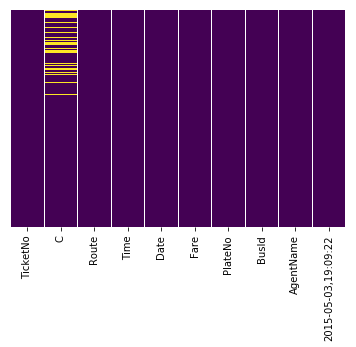

In [7]:
sns.heatmap((df.isnull()),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596879 entries, 0 to 596878
Data columns (total 10 columns):
TicketNo               596879 non-null int64
C                      519210 non-null object
Route                  596879 non-null object
Time                   596879 non-null object
Date                   596879 non-null object
Fare                   596879 non-null int64
PlateNo                596879 non-null object
BusId                  596879 non-null int64
AgentName              596879 non-null object
2015-05-03,19:09:22    596879 non-null object
dtypes: int64(3), object(7)
memory usage: 45.5+ MB


In [9]:
df.describe()

,TicketNo,Fare,BusId
count,596879.000000,596879.000000,596879.000000
mean,326552.808695,2052.503710,227.216275
std,180264.336521,770.391492,2.740968
min,4.000000,0.000000,221.000000
25%,174433.500000,1650.000000,225.000000
50%,330479.000000,1750.000000,228.000000
75%,482089.500000,2900.000000,229.000000
max,633076.000000,3000.000000,234.000000


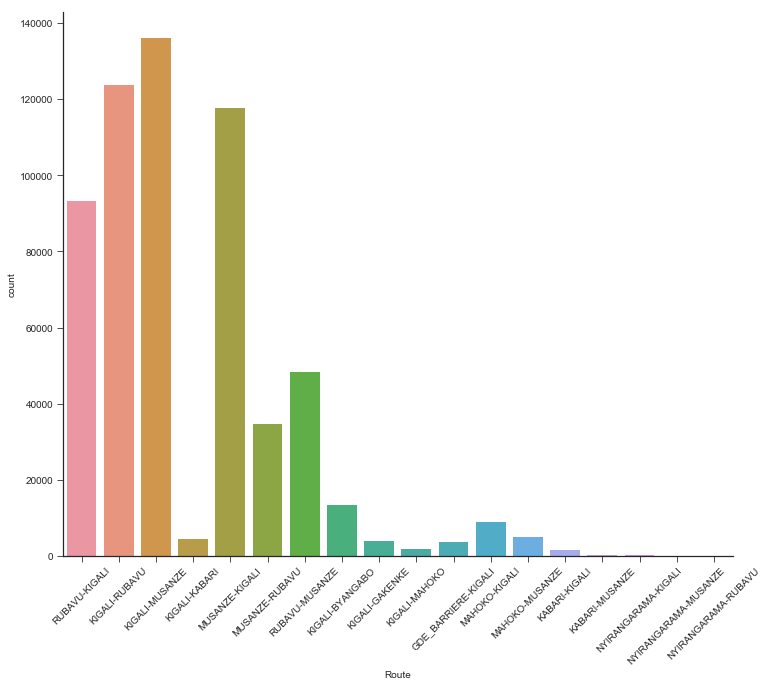

In [10]:
#sns.countplot(x="RUBAVU-KIGALI",data=df)
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 10)
sns.countplot(x="Route",data=df)
sns.despine()

fig.savefig('example.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

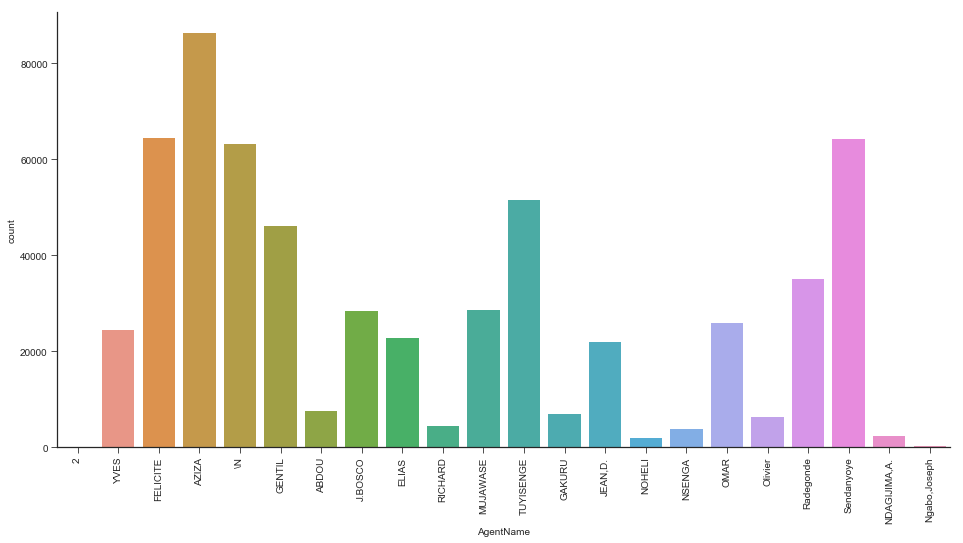

In [11]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 8)
sns.countplot(x="AgentName",data=df)
sns.despine()
fig.savefig('example.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)

In [12]:
df.columns

Index(['TicketNo', 'C', 'Route', 'Time', 'Date', 'Fare', 'PlateNo', 'BusId',
       'AgentName', '2015-05-03,19:09:22'],
      dtype='object')

In [13]:
old_names = ['2015-05-03,19:09:22'] 
new_names = ['TimeStamp']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [14]:
df.columns

Index(['TicketNo', 'C', 'Route', 'Time', 'Date', 'Fare', 'PlateNo', 'BusId',
       'AgentName', 'TimeStamp'],
      dtype='object')

In [15]:
df.head()

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp
0,4,\N,RUBAVU-KIGALI,05h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:12:39"
1,5,NaN,RUBAVU-KIGALI,06h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:14:09"
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49"
3,8,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:23:36"
4,10,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAB134L,224,YVES,"2015-05-04,09:31:18"


In [16]:
df.tail()

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp
596874,633072,J,MUSANZE-RUBAVU,20h45,2015-12-31,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:08:37"
596875,633073,J,MUSANZE-RUBAVU,20h45,2015-12-31,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:11:13"
596876,633074,M,MUSANZE-RUBAVU,20h45,2015-12-31,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:11:52"
596877,633075,JACKISON,MUSANZE-RUBAVU,21h00,2015-12-31,1180,RAB593N,233,"NDAGIJIMA,A.","2015-12-31,20:58:45"
596878,633076,J,MUSANZE-RUBAVU,21h00,2015-12-31,1180,RAB593N,233,"NDAGIJIMA,A.","2015-12-31,20:59:06"


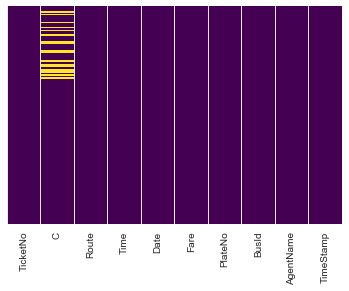

In [17]:
sns.heatmap((df.isnull()),yticklabels=False,cbar=False,cmap='viridis')

In [168]:
df['NumericalMonth']=df['Date'].str[5:7]


In [169]:
df.tail()


,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,StringMonth,RealTimeStamp,TimeStamp2,TimeStamp3,Weekday,Hour,WeekofMonth,WeekofYear
596874,633072,J,MUSANZE-RUBAVU,20h45,20151231,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:08:37",23,December,20:08:37,"2015-12-31,20:08:37",2015-12-31 20:08:37,Thursday,20,5,53
596875,633073,J,MUSANZE-RUBAVU,20h45,20151231,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:11:13",23,December,20:11:13,"2015-12-31,20:11:13",2015-12-31 20:11:13,Thursday,20,5,53
596876,633074,M,MUSANZE-RUBAVU,20h45,20151231,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:11:52",23,December,20:11:52,"2015-12-31,20:11:52",2015-12-31 20:11:52,Thursday,20,5,53
596877,633075,JACKISON,MUSANZE-RUBAVU,21h00,20151231,1180,RAB593N,233,"NDAGIJIMA,A.","2015-12-31,20:58:45",23,December,20:58:45,"2015-12-31,20:58:45",2015-12-31 20:58:45,Thursday,20,5,53
596878,633076,J,MUSANZE-RUBAVU,21h00,20151231,1180,RAB593N,233,"NDAGIJIMA,A.","2015-12-31,20:59:06",23,December,20:59:06,"2015-12-31,20:59:06",2015-12-31 20:59:06,Thursday,20,5,53


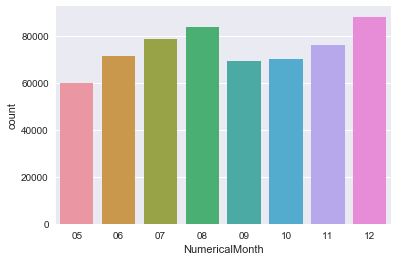

In [20]:
sns.countplot(x="NumericalMonth",data=df)

In [21]:
df['StringMonth']=df['Date'].str[5:7]

In [22]:
df.head()



,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,StringMonth
0,4,\N,RUBAVU-KIGALI,05h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:12:39",05,05
1,5,NaN,RUBAVU-KIGALI,06h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:14:09",05,05
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49",05,05
3,8,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:23:36",05,05
4,10,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAB134L,224,YVES,"2015-05-04,09:31:18",05,05


In [164]:

df['StringMonth']=df['StringMonth'].astype(int)
df['StringMonth'] = df['StringMonth'].apply(lambda x: calendar.month_name[x])



ValueError: invalid literal for int() with base 10: 'May'

In [24]:
df['StringMonth'].tail()

596874    December
596875    December
596876    December
596877    December
596878    December
Name: StringMonth, dtype: object

In [25]:
df.head()

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,StringMonth
0,4,\N,RUBAVU-KIGALI,05h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:12:39",05,May
1,5,NaN,RUBAVU-KIGALI,06h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:14:09",05,May
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49",05,May
3,8,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:23:36",05,May
4,10,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAB134L,224,YVES,"2015-05-04,09:31:18",05,May


In [26]:
df['RealTimeStamp']=df['TimeStamp'].str[11:]

In [27]:
df.head()

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,StringMonth,RealTimeStamp
0,4,\N,RUBAVU-KIGALI,05h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:12:39",05,May,19:12:39
1,5,NaN,RUBAVU-KIGALI,06h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:14:09",05,May,19:14:09
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49",05,May,09:06:49
3,8,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:23:36",05,May,09:23:36
4,10,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAB134L,224,YVES,"2015-05-04,09:31:18",05,May,09:31:18


In [47]:
df['TimeStamp2'] = df['TimeStamp'].replace(',', ' ')



In [48]:
df.head()


,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,StringMonth,RealTimeStamp,TimeStamp2
0,4,\N,RUBAVU-KIGALI,05h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:12:39",05,May,19:12:39,"2015-05-03,19:12:39"
1,5,NaN,RUBAVU-KIGALI,06h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:14:09",05,May,19:14:09,"2015-05-03,19:14:09"
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49",05,May,09:06:49,"2015-05-04,09:06:49"
3,8,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:23:36",05,May,09:23:36,"2015-05-04,09:23:36"
4,10,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAB134L,224,YVES,"2015-05-04,09:31:18",05,May,09:31:18,"2015-05-04,09:31:18"


In [56]:
df["TimeStamp3"]=df['TimeStamp'].replace(',', ' ')
df.head()
df["TimeStamp3"]=df['TimeStamp3'].str.replace(',', ' ')
df.head()

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,StringMonth,RealTimeStamp,TimeStamp2,TimeStamp3
0,4,\N,RUBAVU-KIGALI,05h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:12:39",05,May,19:12:39,"2015-05-03,19:12:39",2015-05-03 19:12:39
1,5,NaN,RUBAVU-KIGALI,06h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:14:09",05,May,19:14:09,"2015-05-03,19:14:09",2015-05-03 19:14:09
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49",05,May,09:06:49,"2015-05-04,09:06:49",2015-05-04 09:06:49
3,8,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:23:36",05,May,09:23:36,"2015-05-04,09:23:36",2015-05-04 09:23:36
4,10,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAB134L,224,YVES,"2015-05-04,09:31:18",05,May,09:31:18,"2015-05-04,09:31:18",2015-05-04 09:31:18


In [62]:
df['TimeStamp3']=pd.to_datetime(df['TimeStamp3'])

In [65]:
df.Route.dtype

dtype('O')

In [66]:
df.BusId.dtype

dtype('int64')

In [74]:
df['Weekday']= df.TimeStamp3.dt.weekday_name
df['Hour']= df.TimeStamp3.dt.hour

In [75]:
df.head()

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,StringMonth,RealTimeStamp,TimeStamp2,TimeStamp3,Weekday,Hour
0,4,\N,RUBAVU-KIGALI,05h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:12:39",05,May,19:12:39,"2015-05-03,19:12:39",2015-05-03 19:12:39,Sunday,19
1,5,NaN,RUBAVU-KIGALI,06h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:14:09",05,May,19:14:09,"2015-05-03,19:14:09",2015-05-03 19:14:09,Sunday,19
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49",05,May,09:06:49,"2015-05-04,09:06:49",2015-05-04 09:06:49,Monday,9
3,8,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:23:36",05,May,09:23:36,"2015-05-04,09:23:36",2015-05-04 09:23:36,Monday,9
4,10,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAB134L,224,YVES,"2015-05-04,09:31:18",05,May,09:31:18,"2015-05-04,09:31:18",2015-05-04 09:31:18,Monday,9


In [80]:
df.groupby("StringMonth").count()

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,RealTimeStamp,TimeStamp2,TimeStamp3,Weekday,Hour
StringMonth,,,,,,,,,,,,,,,,
August,83728,82887,83728,83728,83728,83728,83728,83728,83728,83728,83728,83728,83728,83728,83728,83728
December,88114,88114,88114,88114,88114,88114,88114,88114,88114,88114,88114,88114,88114,88114,88114,88114
July,78461,50185,78461,78461,78461,78461,78461,78461,78461,78461,78461,78461,78461,78461,78461,78461
June,71225,45459,71225,71225,71225,71225,71225,71225,71225,71225,71225,71225,71225,71225,71225,71225
May,59762,37026,59762,59762,59762,59762,59762,59762,59762,59762,59762,59762,59762,59762,59762,59762
November,76194,76194,76194,76194,76194,76194,76194,76194,76194,76194,76194,76194,76194,76194,76194,76194
October,70087,70085,70087,70087,70087,70087,70087,70087,70087,70087,70087,70087,70087,70087,70087,70087
September,69308,69260,69308,69308,69308,69308,69308,69308,69308,69308,69308,69308,69308,69308,69308,69308


In [89]:
df['WeekofYear']= df.TimeStamp3.dt.weekofyear

In [91]:
df.head()


,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,StringMonth,RealTimeStamp,TimeStamp2,TimeStamp3,Weekday,Hour,WeekofMonth,WeekofYear
0,4,\N,RUBAVU-KIGALI,05h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:12:39",05,May,19:12:39,"2015-05-03,19:12:39",2015-05-03 19:12:39,Sunday,19,18,18
1,5,NaN,RUBAVU-KIGALI,06h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:14:09",05,May,19:14:09,"2015-05-03,19:14:09",2015-05-03 19:14:09,Sunday,19,18,18
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49",05,May,09:06:49,"2015-05-04,09:06:49",2015-05-04 09:06:49,Monday,9,19,19
3,8,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:23:36",05,May,09:23:36,"2015-05-04,09:23:36",2015-05-04 09:23:36,Monday,9,19,19
4,10,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAB134L,224,YVES,"2015-05-04,09:31:18",05,May,09:31:18,"2015-05-04,09:31:18",2015-05-04 09:31:18,Monday,9,19,19


In [98]:
d=datetime.datetime(2015, 5, 3)
week = (d.day-1)//7+1
df['Date']= df['Date'].dt.strftime("%Y%m%d").astype(int)

In [117]:
df['Date'] = df['Date'].astype(str)


In [135]:
year = df['Date'].str[0:4].astype(int)
month = df['Date'].str[4:6].astype(int)
day = df['Date'].str[6:].astype(int)




In [153]:
df['WeekofMonth'] = df['TimeStamp3'].apply(lambda d: (d.day-1) // 7 + 1)



In [157]:
df.groupby('WeekofMonth').count()



,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,StringMonth,RealTimeStamp,TimeStamp2,TimeStamp3,Weekday,Hour,WeekofYear
WeekofMonth,,,,,,,,,,,,,,,,,,
1,130465,114676,130465,130465,130465,130465,130465,130465,130465,130465,130465,130465,130465,130465,130465,130465,130465,130465
2,138920,119154,138920,138920,138920,138920,138920,138920,138920,138920,138920,138920,138920,138920,138920,138920,138920,138920
3,137702,119540,137702,137702,137702,137702,137702,137702,137702,137702,137702,137702,137702,137702,137702,137702,137702,137702
4,134172,116100,134172,134172,134172,134172,134172,134172,134172,134172,134172,134172,134172,134172,134172,134172,134172,134172
5,55620,49740,55620,55620,55620,55620,55620,55620,55620,55620,55620,55620,55620,55620,55620,55620,55620,55620


In [203]:
df.tail()



,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp,NumericalMonth,StringMonth,RealTimeStamp,TimeStamp2,TimeStamp3,Weekday,Hour,WeekofMonth,WeekofYear
596874,633072,J,MUSANZE-RUBAVU,20h45,20151231,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:08:37",23,December,20:08:37,"2015-12-31,20:08:37",2015-12-31 20:08:37,Thursday,20,5,53
596875,633073,J,MUSANZE-RUBAVU,20h45,20151231,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:11:13",23,December,20:11:13,"2015-12-31,20:11:13",2015-12-31 20:11:13,Thursday,20,5,53
596876,633074,M,MUSANZE-RUBAVU,20h45,20151231,1180,RAC113Y,227,"JEAN,D.","2015-12-31,20:11:52",23,December,20:11:52,"2015-12-31,20:11:52",2015-12-31 20:11:52,Thursday,20,5,53
596877,633075,JACKISON,MUSANZE-RUBAVU,21h00,20151231,1180,RAB593N,233,"NDAGIJIMA,A.","2015-12-31,20:58:45",23,December,20:58:45,"2015-12-31,20:58:45",2015-12-31 20:58:45,Thursday,20,5,53
596878,633076,J,MUSANZE-RUBAVU,21h00,20151231,1180,RAB593N,233,"NDAGIJIMA,A.","2015-12-31,20:59:06",23,December,20:59:06,"2015-12-31,20:59:06",2015-12-31 20:59:06,Thursday,20,5,53


# Weekday Performance 


dtype('int64')

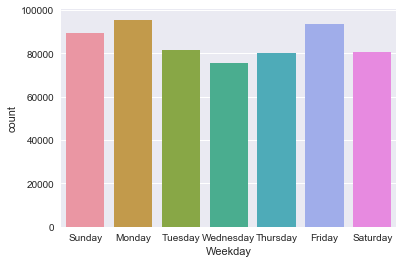

In [202]:
sns.countplot(x='Weekday', data=df)
df.WeekofMonth.dtype




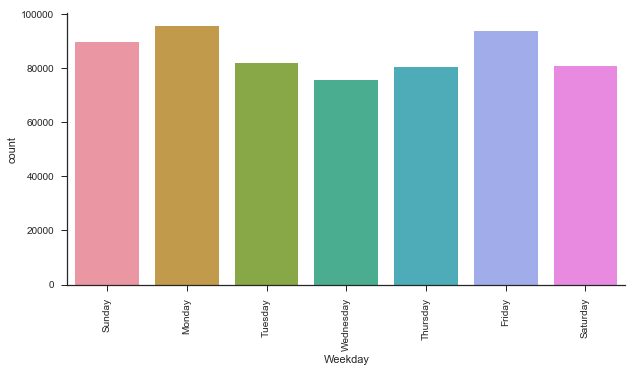

In [187]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="Weekday",data=df)
sns.despine()
fig.savefig('Weekday.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)

In [204]:
df.Weekday.value_counts()

Monday       95542
Friday       93788
Sunday       89636
Tuesday      81675
Saturday     80616
Thursday     80224
Wednesday    75398
Name: Weekday, dtype: int64

# Week of the month performance 


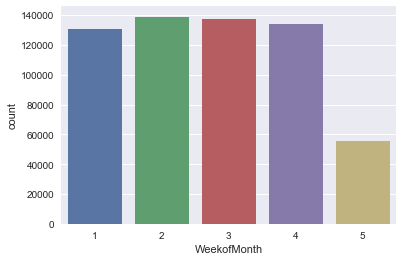

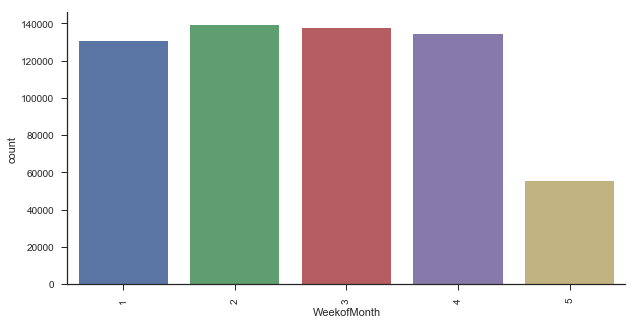

In [191]:
sns.countplot(x='WeekofMonth',data=df)

sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)
sns.countplot(x="WeekofMonth",data=df)
sns.despine()
fig.savefig('Monthly.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)


In [206]:
df.WeekofMonth.value_counts() 

2    138920
3    137702
4    134172
1    130465
5     55620
Name: WeekofMonth, dtype: int64

# Hourly Performance Per Ticket Sales

In [205]:
df.Hour.value_counts()

16    47059
15    46062
6     45567
14    44514
13    42442
17    42110
11    41713
12    40566
10    40213
9     37871
7     36948
8     36698
5     34732
18    27552
4     19412
19     7470
3      4904
20      703
2       205
21      115
23       10
22       10
0         2
1         1
Name: Hour, dtype: int64

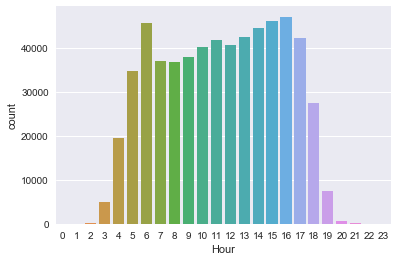

In [200]:
sns.countplot(x='Hour',data=df)

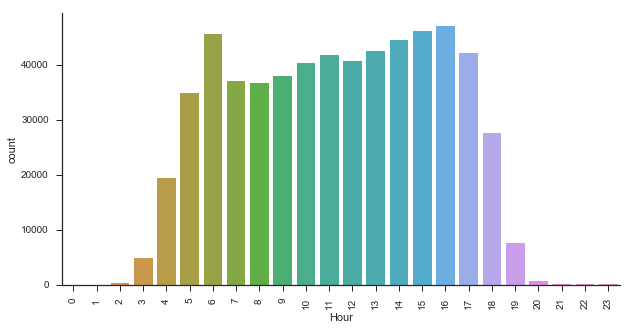

In [207]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="Hour",data=df)
sns.despine()
fig.savefig('Monthly.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)

# Monthly Performance 

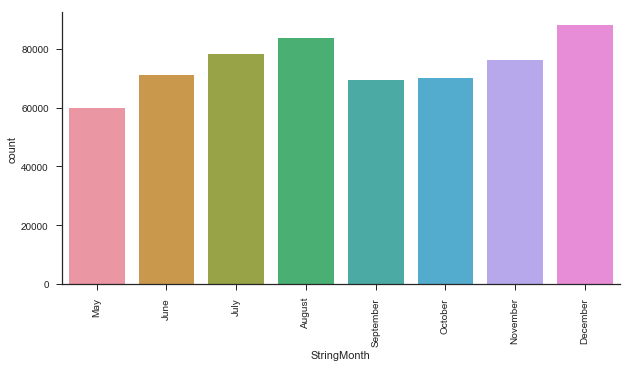

In [184]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="StringMonth",data=df)
sns.despine()
fig.savefig('Monthly.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)

In [213]:
df.StringMonth.value_counts()


December     88114
August       83728
July         78461
November     76194
June         71225
October      70087
September    69308
May          59762
Name: StringMonth, dtype: int64

# Route Performance



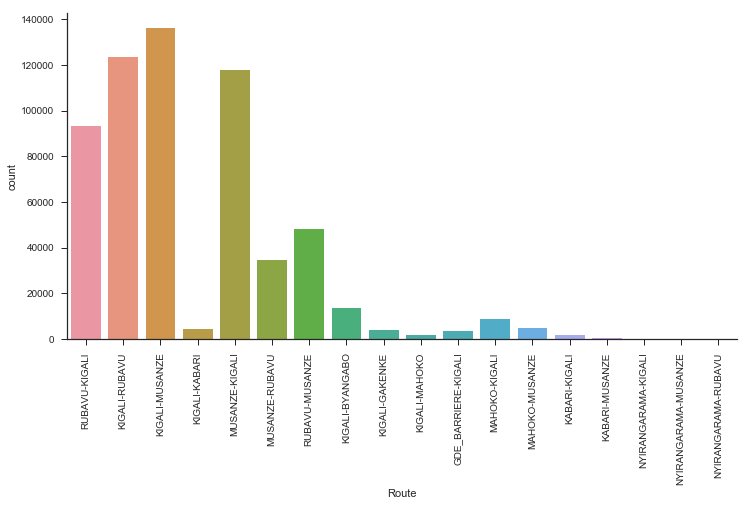

In [215]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 6)
sns.countplot(x="Route",data=df)
sns.despine()
fig.savefig('Routes.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)

In [212]:
df.Route.value_counts()

KIGALI-MUSANZE          135959
KIGALI-RUBAVU           123611
MUSANZE-KIGALI          117670
RUBAVU-KIGALI            93166
RUBAVU-MUSANZE           48277
MUSANZE-RUBAVU           34640
KIGALI-BYANGABO          13437
MAHOKO-KIGALI             8844
MAHOKO-MUSANZE            5010
KIGALI-KABARI             4554
KIGALI-GAKENKE            3872
GDE_BARRIERE-KIGALI       3686
KIGALI-MAHOKO             1769
KABARI-KIGALI             1707
KABARI-MUSANZE             410
NYIRANGARAMA-KIGALI        208
NYIRANGARAMA-MUSANZE        41
NYIRANGARAMA-RUBAVU         18
Name: Route, dtype: int64

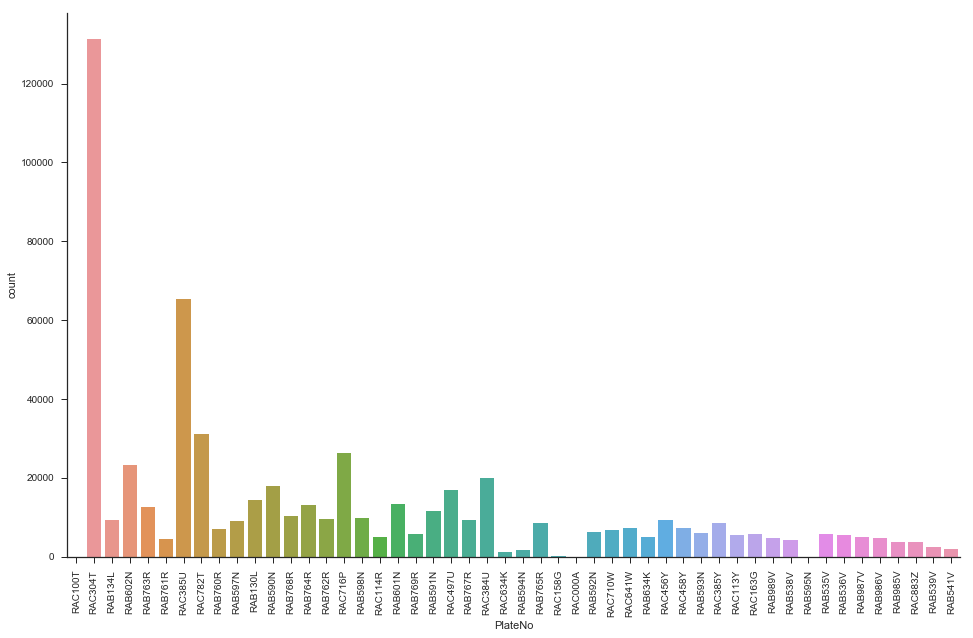

In [18]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 10)
sns.countplot(x="PlateNo",data=df)
sns.despine()
fig.savefig('example.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)

In [19]:
df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596879 entries, 0 to 596878
Data columns (total 10 columns):
TicketNo     596879 non-null int64
C            519210 non-null object
Route        596879 non-null object
Time         596879 non-null object
Date         596879 non-null object
Fare         596879 non-null int64
PlateNo      596879 non-null object
BusId        596879 non-null int64
AgentName    596879 non-null object
TimeStamp    596879 non-null object
dtypes: int64(3), object(7)
memory usage: 45.5+ MB


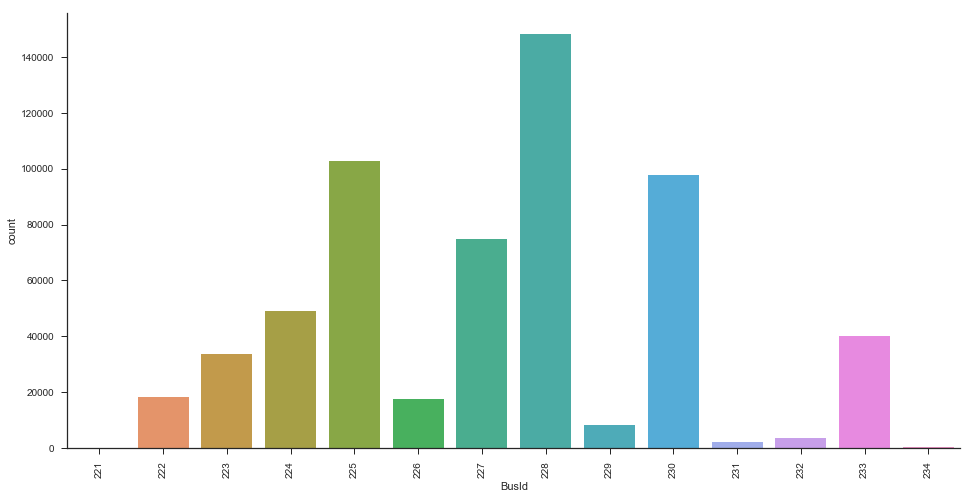

In [20]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 8)
sns.countplot(x="BusId",data=df)
sns.despine()
fig.savefig('example.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)

In [21]:
df.columns

Index(['TicketNo', 'C', 'Route', 'Time', 'Date', 'Fare', 'PlateNo', 'BusId',
       'AgentName', 'TimeStamp'],
      dtype='object')

In [22]:
df.shape


(596879, 10)

In [23]:
df.head(2)

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp
0,4,\N,RUBAVU-KIGALI,05h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:12:39"
1,5,NaN,RUBAVU-KIGALI,06h00,2015-05-03,2900,RAC100T,226,2,"2015-05-03,19:14:09"


In [24]:
df[(df.PlateNo == 'RAC304T')].head(4)

,TicketNo,C,Route,Time,Date,Fare,PlateNo,BusId,AgentName,TimeStamp
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49"
3,8,NaN,KIGALI-RUBAVU,10h00,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:23:36"
77,90,NaN,KIGALI-RUBAVU,12h30,2015-05-04,2900,RAC304T,224,FELICITE,"2015-05-04,11:18:34"
138,183,\N,KIGALI-MUSANZE,18h00,2015-05-04,1650,RAC304T,224,\N,"2015-05-04,17:37:52"


In [25]:
old_names = ['C','PlateNo'] 
new_names = [ 'Client','BusNo']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)


In [26]:
df.columns

Index(['TicketNo', 'Client', 'Route', 'Time', 'Date', 'Fare', 'BusNo', 'BusId',
       'AgentName', 'TimeStamp'],
      dtype='object')

# KIGALI-RUBAVU 2015 9h30

In [27]:
dfKR = df[(df.Route=="KIGALI-RUBAVU") & (df.Time == "09h30")]

In [28]:
dfKR.head()

,TicketNo,Client,Route,Time,Date,Fare,BusNo,BusId,AgentName,TimeStamp
2,6,NaN,KIGALI-RUBAVU,09h30,2015-05-04,2900,RAC304T,224,YVES,"2015-05-04,09:06:49"
755,902,\N,KIGALI-RUBAVU,09h30,2015-05-05,2900,RAB601N,228,\N,"2015-05-05,08:54:05"
767,916,\N,KIGALI-RUBAVU,09h30,2015-05-05,2900,RAB601N,228,\N,"2015-05-05,08:59:04"
768,917,\N,KIGALI-RUBAVU,09h30,2015-05-05,2900,RAB601N,228,\N,"2015-05-05,08:59:09"
771,920,NaN,KIGALI-RUBAVU,09h30,2015-05-05,2900,RAB601N,224,\N,"2015-05-05,08:59:52"


In [29]:
dfKR.Fare.min()

0

In [30]:
dfKR.Fare.max()

3000

In [31]:
dfKR.Fare.sum()

9780700

In [32]:
dfKR.shape

(3425, 10)

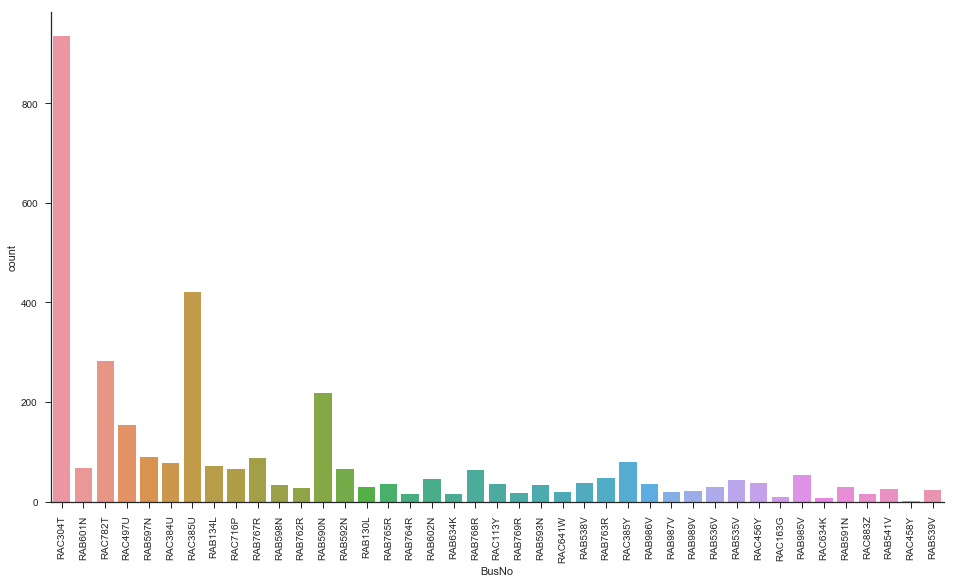

In [33]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 9)
sns.countplot(x= "BusNo",data=dfKR)
sns.despine()
fig.savefig('example.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 2)

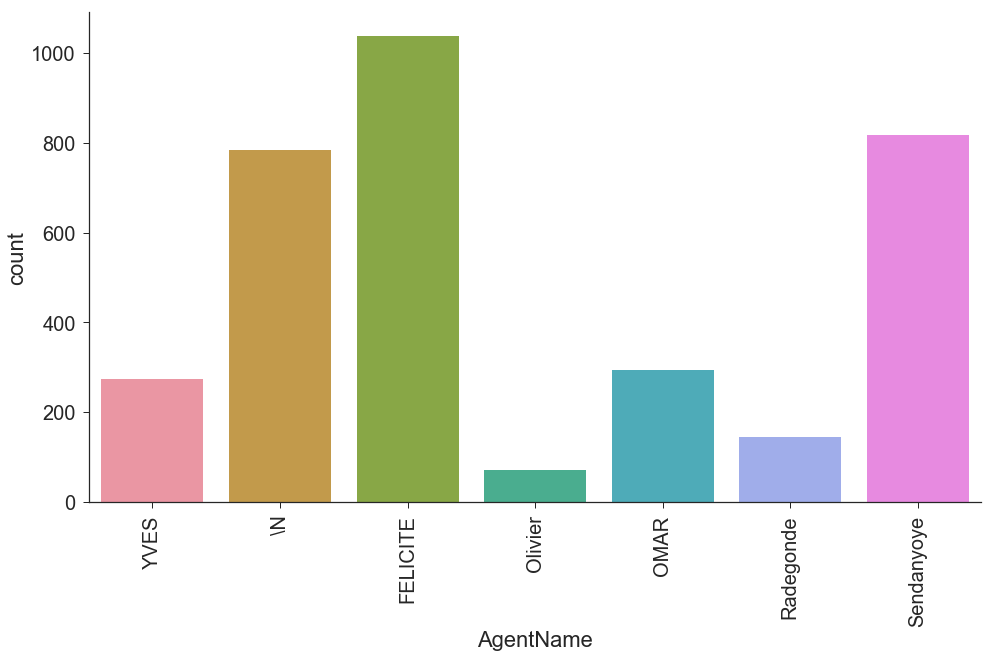

In [34]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 9)
sns.countplot(x= "AgentName",data=dfKR)
sns.despine()
fig.savefig('example.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 2)

In [35]:
dfk = df['Time']


In [36]:
dfk

0         05h00
1         06h00
2         09h30
3         10h00
4         10h00
5         10h00
6         10h00
7         10h00
8         10h00
9         10h00
10        10h00
11        10h00
12        10h00
13        10h00
14        10h00
15        10h00
16        10h00
17        10h00
18        10h00
19        10h00
20        10h00
21        10h00
22        10h00
23        10h00
24        10h00
25        10h00
26        10h00
27        10h00
28        10h00
29        10h00
          ...  
596849    20h00
596850    06h00
596851    06h00
596852    20h00
596853    06h00
596854    20h00
596855    20h00
596856    06h00
596857    20h15
596858    06h00
596859    20h15
596860    06h00
596861    06h00
596862    20h00
596863    20h15
596864    20h45
596865    20h45
596866    20h45
596867    20h15
596868    20h15
596869    20h15
596870    20h15
596871    20h15
596872    20h15
596873    20h15
596874    20h45
596875    20h45
596876    20h45
596877    21h00
596878    21h00
Name: Time, Length: 5968

In [38]:
dfk.head(6)

0    05h00
1    06h00
2    09h30
3    10h00
4    10h00
5    10h00
Name: Time, dtype: object

In [45]:
dfk.columns

AttributeError: 'Series' object has no attribute 'columns'

In [132]:
 a= df['Time'].unique().tolist()

In [133]:
a

['05h00',
 '06h00',
 '09h30',
 '10h00',
 '10h30',
 '11h00',
 '11h30',
 '12h30',
 '11h31',
 '11h32',
 '11h33',
 '12h00',
 '12h15',
 '13h00',
 '09h00',
 '17h30',
 '18h30',
 '18h00',
 '18h31',
 '19h00',
 '19h30',
 '05h30',
 '21h00',
 '05h15',
 '05h45',
 '06h02',
 '06h30',
 '06h15',
 '07h00',
 '07h15',
 '07h30',
 '08h00',
 '08h01',
 '08h30',
 '08h31',
 '09h31',
 '10h01',
 '10h06',
 '10h04',
 '10h31',
 '10h33',
 '10h34',
 '10h35',
 '10h32',
 '11h15',
 '11h34',
 '11h35',
 '11h45',
 '12h01',
 '12h02',
 '12h03',
 '12h04',
 '13h01',
 '12h31',
 '12h34',
 '13h04',
 '14h00',
 '13h30',
 '13h31',
 '13h32',
 '14h01',
 '14h30',
 '14h03',
 '15h30',
 '14h33',
 '15h00',
 '15h01',
 '15h02',
 '15h03',
 '15h04',
 '15h05',
 '15h06',
 '15h31',
 '15h32',
 '15h33',
 '16h00',
 '16h01',
 '16h30',
 '16h31',
 '16h45',
 '17h00',
 '17h01',
 '17h31',
 '18h01',
 '18h02',
 '04h30',
 '19h01',
 '19h02',
 '19h04',
 '19h31',
 '20h00',
 '04h31',
 '04h33',
 '05h01',
 '05h02',
 '05h32',
 '05h31',
 '06h31',
 '06h01',
 '07h01',


In [134]:
dfKq = df[(df.Time == "11h02")]   #Time lag of 8 eight minutes per designated standard time. 

In [135]:
dfKq.count()

TicketNo     42
Client        9
Route        42
Time         42
Date         42
Fare         42
BusNo        42
BusId        42
AgentName    42
TimeStamp    42
dtype: int64

In [142]:
len(a)

487

In [144]:
df['Time'].unique()

array(['05h00', '06h00', '09h30', '10h00', '10h30', '11h00', '11h30',
       '12h30', '11h31', '11h32', '11h33', '12h00', '12h15', '13h00',
       '09h00', '17h30', '18h30', '18h00', '18h31', '19h00', '19h30',
       '05h30', '21h00', '05h15', '05h45', '06h02', '06h30', '06h15',
       '07h00', '07h15', '07h30', '08h00', '08h01', '08h30', '08h31',
       '09h31', '10h01', '10h06', '10h04', '10h31', '10h33', '10h34',
       '10h35', '10h32', '11h15', '11h34', '11h35', '11h45', '12h01',
       '12h02', '12h03', '12h04', '13h01', '12h31', '12h34', '13h04',
       '14h00', '13h30', '13h31', '13h32', '14h01', '14h30', '14h03',
       '15h30', '14h33', '15h00', '15h01', '15h02', '15h03', '15h04',
       '15h05', '15h06', '15h31', '15h32', '15h33', '16h00', '16h01',
       '16h30', '16h31', '16h45', '17h00', '17h01', '17h31', '18h01',
       '18h02', '04h30', '19h01', '19h02', '19h04', '19h31', '20h00',
       '04h31', '04h33', '05h01', '05h02', '05h32', '05h31', '06h31',
       '06h01', '07h

In [161]:
seq = ['abc123', 'def456', 'ghi789']
sub = 'abc'
list2 =[]

for text in seq:
    if sub in text:
        list2.append(text)

In [162]:
list2

['abc123']

In [154]:
alist = a.tolist()

In [155]:
type(alist)

list

In [163]:

sub = '11h'
list2 =[]

for text in alist:
    if sub in text:
        list2.append(text)
        
        

In [165]:
list2

['11h00',
 '11h30',
 '11h31',
 '11h32',
 '11h33',
 '11h15',
 '11h34',
 '11h35',
 '11h45',
 '11h01',
 '11h02',
 '11h50',
 '11h20',
 '11h04',
 '11h03',
 '11h06',
 '11h07',
 '11h08',
 '11h36',
 '11h53',
 '11h55',
 '11h56',
 '11h52',
 '11h54',
 '11h05',
 '11h21',
 '11h10',
 '11h11',
 '11h12',
 '11h37',
 '11h38',
 '11h22',
 '11h23',
 '11h44',
 '11h47',
 '11h16']

In [166]:
len(list2)

36

In [169]:
list2 = [w.replace('h', '') for w in list2]

In [170]:
list2

['1100',
 '1130',
 '1131',
 '1132',
 '1133',
 '1115',
 '1134',
 '1135',
 '1145',
 '1101',
 '1102',
 '1150',
 '1120',
 '1104',
 '1103',
 '1106',
 '1107',
 '1108',
 '1136',
 '1153',
 '1155',
 '1156',
 '1152',
 '1154',
 '1105',
 '1121',
 '1110',
 '1111',
 '1112',
 '1137',
 '1138',
 '1122',
 '1123',
 '1144',
 '1147',
 '1116']

In [171]:
len(list2)

36

In [172]:
list2 = list(map(int, list2))

In [173]:
list2

[1100,
 1130,
 1131,
 1132,
 1133,
 1115,
 1134,
 1135,
 1145,
 1101,
 1102,
 1150,
 1120,
 1104,
 1103,
 1106,
 1107,
 1108,
 1136,
 1153,
 1155,
 1156,
 1152,
 1154,
 1105,
 1121,
 1110,
 1111,
 1112,
 1137,
 1138,
 1122,
 1123,
 1144,
 1147,
 1116]

In [174]:
list2.sort()

In [175]:
list2

[1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1110,
 1111,
 1112,
 1115,
 1116,
 1120,
 1121,
 1122,
 1123,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1144,
 1145,
 1147,
 1150,
 1152,
 1153,
 1154,
 1155,
 1156]

In [178]:
dfK11 = df[(df.Time == "11h00")]

In [180]:
df['Time']

0         05h00
1         06h00
2         09h30
3         10h00
4         10h00
5         10h00
6         10h00
7         10h00
8         10h00
9         10h00
10        10h00
11        10h00
12        10h00
13        10h00
14        10h00
15        10h00
16        10h00
17        10h00
18        10h00
19        10h00
20        10h00
21        10h00
22        10h00
23        10h00
24        10h00
25        10h00
26        10h00
27        10h00
28        10h00
29        10h00
          ...  
596849    20h00
596850    06h00
596851    06h00
596852    20h00
596853    06h00
596854    20h00
596855    20h00
596856    06h00
596857    20h15
596858    06h00
596859    20h15
596860    06h00
596861    06h00
596862    20h00
596863    20h15
596864    20h45
596865    20h45
596866    20h45
596867    20h15
596868    20h15
596869    20h15
596870    20h15
596871    20h15
596872    20h15
596873    20h15
596874    20h45
596875    20h45
596876    20h45
596877    21h00
596878    21h00
Name: Time, Length: 5968

In [276]:
list2

[1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1110,
 1111,
 1112,
 1115,
 1116,
 1120,
 1121,
 1122,
 1123,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1144,
 1145,
 1147,
 1150,
 1152,
 1153,
 1154,
 1155,
 1156]

In [283]:
%pprint

Pretty printing has been turned OFF


In [284]:
list2

[1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1110, 1111, 1112, 1115, 1116, 1120, 1121, 1122, 1123, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1144, 1145, 1147, 1150, 1152, 1153, 1154, 1155, 1156]

In [332]:
dftime = df[(df.Time == "11h01")]

In [333]:
dftime

,TicketNo,Client,Route,Time,Date,Fare,BusNo,BusId,AgentName,TimeStamp
2897,3485,NaN,RUBAVU-KIGALI,11h01,2015-05-06,2900,RAB764R,225,ELIAS,"2015-05-06,10:39:56"
2911,3505,NaN,KIGALI-MUSANZE,11h01,2015-05-06,1650,RAB763R,228,FELICITE,"2015-05-06,10:46:03"
4901,5910,NaN,KIGALI-RUBAVU,11h01,2015-05-07,2900,RAC385U,228,\N,"2015-05-07,10:47:11"
4938,5957,\N,KIGALI-MUSANZE,11h01,2015-05-07,1650,RAC716P,228,\N,"2015-05-07,11:05:11"
4939,5958,NaN,KIGALI-MUSANZE,11h01,2015-05-07,1650,RAC716P,228,\N,"2015-05-07,11:05:34"
4940,5959,NaN,KIGALI-MUSANZE,11h01,2015-05-07,0,RAC716P,228,\N,"2015-05-07,11:06:11"
4945,5964,NaN,KIGALI-MUSANZE,11h01,2015-05-07,1650,RAC716P,228,\N,"2015-05-07,11:07:13"
4946,5966,NaN,KIGALI-MUSANZE,11h01,2015-05-07,1650,RAC716P,228,\N,"2015-05-07,11:07:49"
4948,5968,\N,KIGALI-MUSANZE,11h01,2015-05-07,1650,RAC716P,228,\N,"2015-05-07,11:08:25"
4949,5969,\N,KIGALI-MUSANZE,11h01,2015-05-07,1650,RAC716P,228,\N,"2015-05-07,11:09:00"


In [325]:
dftime.count()

TicketNo     1
Client       0
Route        1
Time         1
Date         1
Fare         1
BusNo        1
BusId        1
AgentName    1
TimeStamp    1
dtype: int64

In [327]:
df.filter(like='11h', axis=0)

,TicketNo,Client,Route,Time,Date,Fare,BusNo,BusId,AgentName,TimeStamp


In [378]:

#k.columns=['some_thing']
eleven=df[df['Time'].str.contains("11h") ]

# Kigali Rubavu 11am

In [376]:
elevenKR = eleven[(eleven.Route=="KIGALI-RUBAVU")]

In [389]:
elevenKR

,TicketNo,Client,Route,Time,Date,Fare,BusNo,BusId,AgentName,TimeStamp
43,50,NaN,KIGALI-RUBAVU,11h00,2015-05-04,2900,RAB763R,224,YVES,"2015-05-04,10:21:35"
44,51,\N,KIGALI-RUBAVU,11h00,2015-05-04,2900,RAB763R,224,YVES,"2015-05-04,10:21:53"
49,56,NaN,KIGALI-RUBAVU,11h00,2015-05-04,2900,RAB763R,224,FELICITE,"2015-05-04,10:36:49"
53,60,NaN,KIGALI-RUBAVU,11h00,2015-05-04,2900,RAB763R,224,FELICITE,"2015-05-04,10:41:15"
55,62,NaN,KIGALI-RUBAVU,11h00,2015-05-04,2900,RAB763R,224,FELICITE,"2015-05-04,10:43:42"
57,64,\N,KIGALI-RUBAVU,11h00,2015-05-04,2900,RAB763R,224,FELICITE,"2015-05-04,10:46:42"
60,67,NaN,KIGALI-RUBAVU,11h00,2015-05-04,2900,RAB763R,224,FELICITE,"2015-05-04,10:51:09"
61,68,NaN,KIGALI-RUBAVU,11h00,2015-05-04,2900,RAB763R,224,FELICITE,"2015-05-04,10:52:44"
62,69,NaN,KIGALI-RUBAVU,11h00,2015-05-04,2900,RAB763R,224,FELICITE,"2015-05-04,10:54:28"
64,71,NaN,KIGALI-RUBAVU,11h30,2015-05-04,2900,RAC385U,224,FELICITE,"2015-05-04,11:03:32"


# Bus Performance 

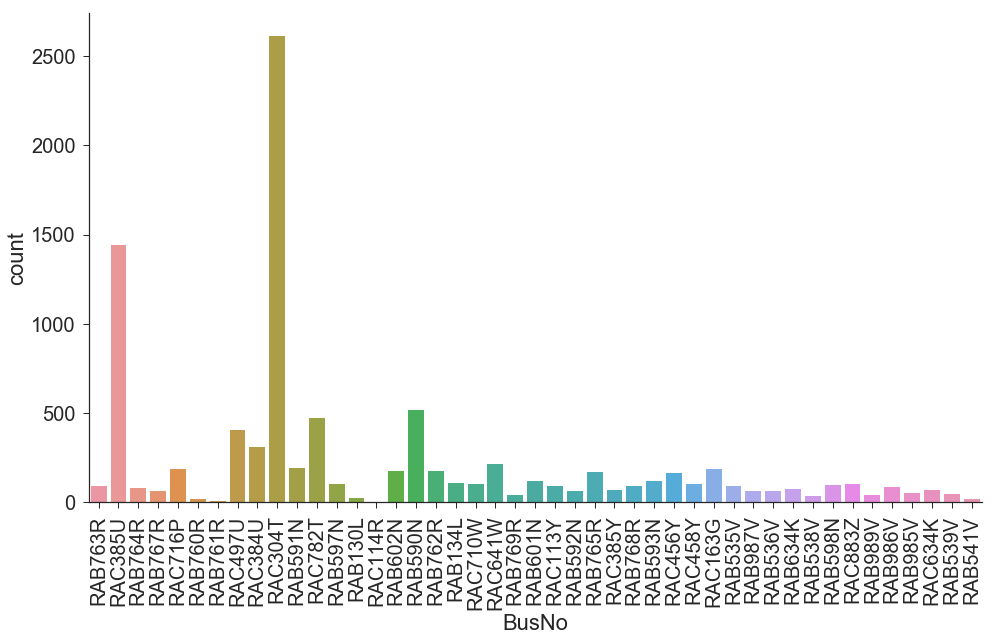

In [391]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 9)
sns.countplot(x= "BusNo",data=elevenKR)
sns.despine()
fig.savefig('KigaliRubavuEleven.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 2)

In [383]:
Total_elevenKR = sum(elevenKR['Fare'])

In [386]:
Total_elevenKR

26572700

# Agent Performance 

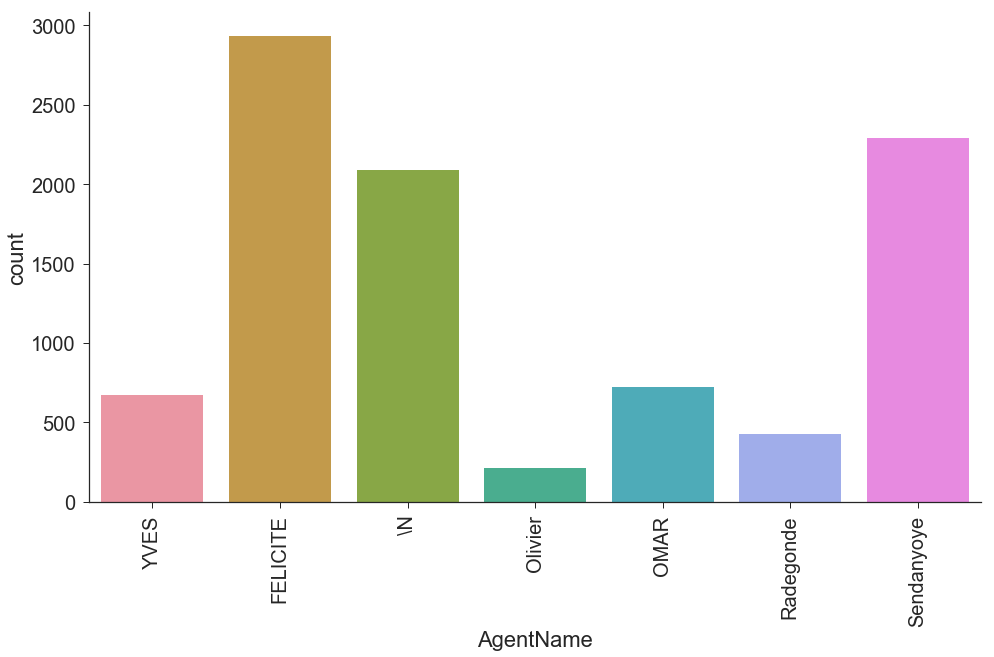

In [390]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 9)
sns.countplot(x= "AgentName",data=elevenKR)
sns.despine()
fig.savefig('KigaliRubavuElevenAgent.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 2)

# Kigali-Rubavu 8am

In [407]:
eight=df[df['Time'].str.contains("08h") ]

## All eight o'clock routes 

In [441]:
eight.head()


,TicketNo,Client,Route,Time,Date,Fare,BusNo,BusId,AgentName,TimeStamp
571,681,NaN,MUSANZE-RUBAVU,08h00,2015-05-05,1100,RAC716P,227,ABDOU,"2015-05-05,07:07:58"
609,735,NaN,MUSANZE-KIGALI,08h00,2015-05-05,1650,RAB764R,223,J.BOSCO,"2015-05-05,07:35:26"
612,738,\N,KIGALI-GAKENKE,08h00,2015-05-05,1200,RAB760R,228,\N,"2015-05-05,07:36:01"
614,740,\N,KIGALI-MUSANZE,08h00,2015-05-05,1650,RAB760R,228,\N,"2015-05-05,07:36:58"
615,741,\N,MUSANZE-RUBAVU,08h00,2015-05-05,1100,RAC716P,227,ABDOU,"2015-05-05,07:36:59"


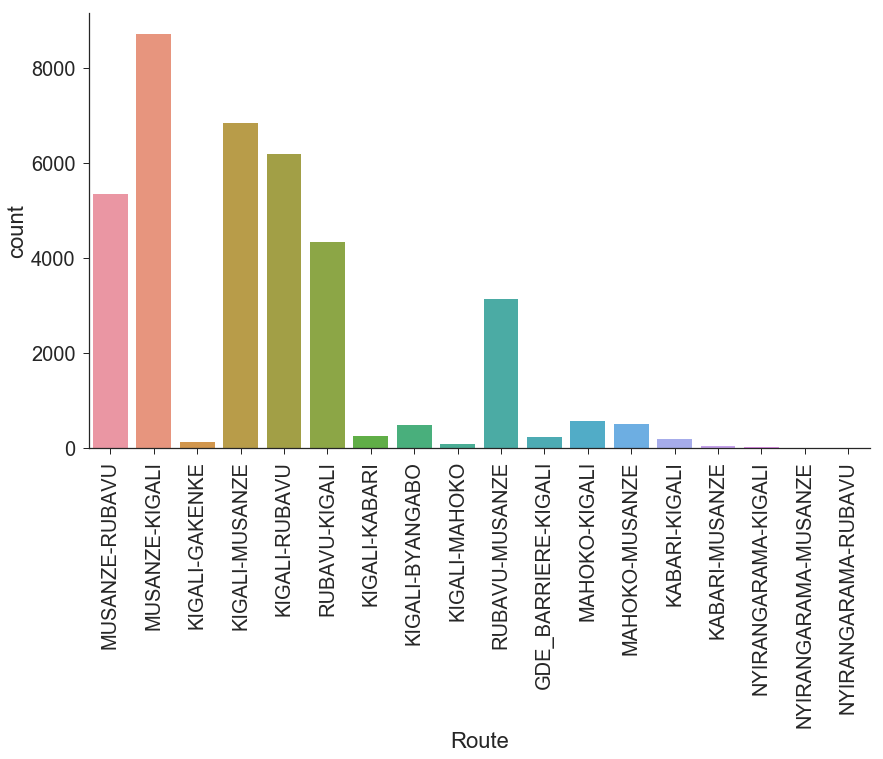

In [450]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(14, 8)
sns.countplot(x= "Route",data=eight)
sns.despine()
fig.savefig('AllRoutesEight.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)

In [451]:
musanzeKigali = eight[(eight.Route == "MUSANZE-KIGALI")]

In [453]:
TotalEight = sum(eight['Fare'])

In [455]:
TotalEight

70648950

In [457]:
eight.count()

TicketNo     37065
Client       33233
Route        37065
Time         37065
Date         37065
Fare         37065
BusNo        37065
BusId        37065
AgentName    37065
TimeStamp    37065
dtype: int64

In [440]:
musanzeKigali.head()

,TicketNo,Client,Route,Time,Date,Fare,BusNo,BusId,AgentName,TimeStamp
609,735,NaN,MUSANZE-KIGALI,08h00,2015-05-05,1650,RAB764R,223,J.BOSCO,"2015-05-05,07:35:26"
620,749,CLEMANCE,MUSANZE-KIGALI,08h00,2015-05-05,1650,RAB764R,223,J.BOSCO,"2015-05-05,07:39:24"
623,752,NaN,MUSANZE-KIGALI,08h00,2015-05-05,1650,RAC304T,227,ABDOU,"2015-05-05,07:39:42"
626,755,TWAGIRIMANA,MUSANZE-KIGALI,08h00,2015-05-05,1650,RAB764R,223,J.BOSCO,"2015-05-05,07:40:01"
648,785,NaN,MUSANZE-KIGALI,08h30,2015-05-05,1650,RAC304T,227,ABDOU,"2015-05-05,07:59:32"


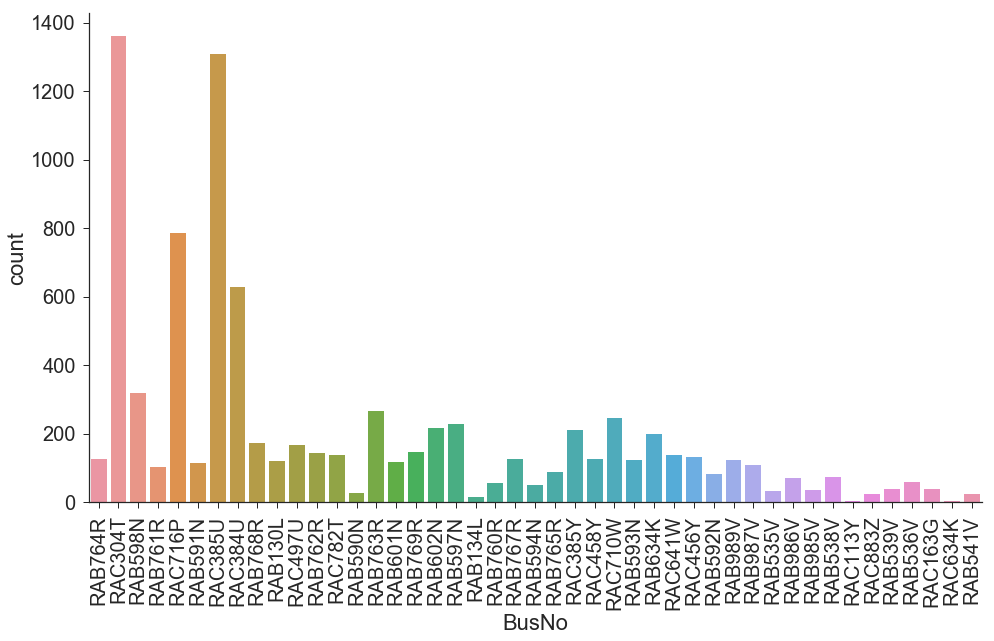

In [417]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 9)
sns.countplot(x= "BusNo",data=musanzeKigali)
sns.despine()
fig.savefig('MusanzeKigali.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 2)

In [418]:
AmountMusanzeK = sum(musanzeKigali['Fare'])

In [416]:
AmountMusanzeK

14375550

In [421]:
KigaliRubavueight = eight[(eight.Route)=='KIGALI-RUBAVU']

In [439]:
KigaliRubavueight.head(5)

,TicketNo,Client,Route,Time,Date,Fare,BusNo,BusId,AgentName,TimeStamp
619,746,\N,KIGALI-RUBAVU,08h00,2015-05-05,2900,RAB760R,228,\N,"2015-05-05,07:37:43"
622,751,\N,KIGALI-RUBAVU,08h00,2015-05-05,2900,RAB760R,228,\N,"2015-05-05,07:39:37"
625,754,\N,KIGALI-RUBAVU,08h00,2015-05-05,2900,RAB760R,228,\N,"2015-05-05,07:39:55"
630,762,\N,KIGALI-RUBAVU,08h00,2015-05-05,2900,RAB760R,228,\N,"2015-05-05,07:44:01"
631,763,\N,KIGALI-RUBAVU,08h00,2015-05-05,2900,RAB760R,228,\N,"2015-05-05,07:44:04"


In [423]:
sum(KigaliRubavueight['Fare'])

17605700

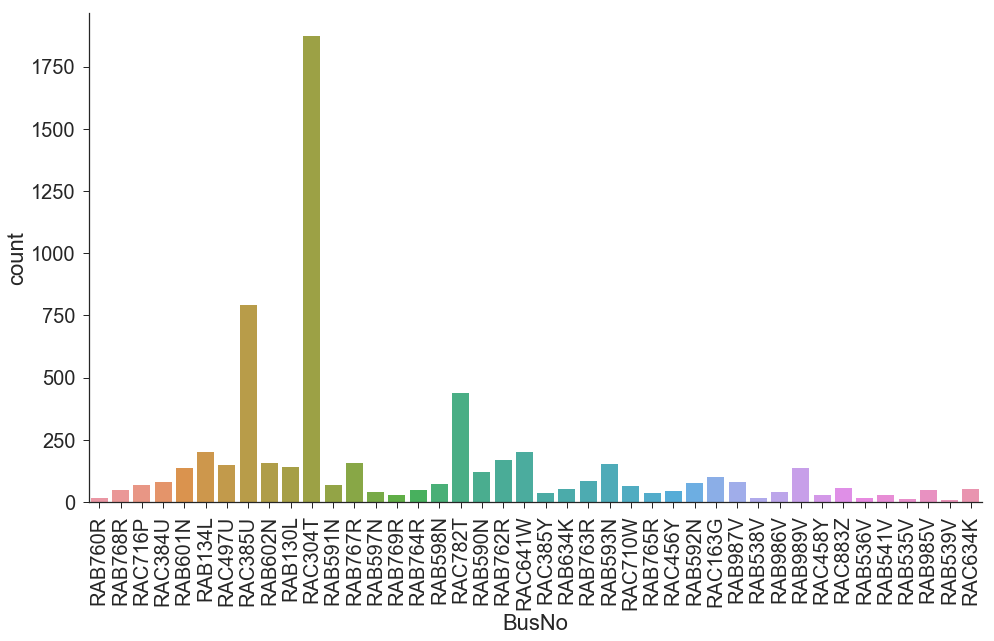

In [425]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 9)
sns.countplot(x= "BusNo",data=KigaliRubavu)
sns.despine()
fig.savefig('KigaliRubavueight.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 2)

In [429]:
kigaliMusanze = eight[(eight.Route=='KIGALI-MUSANZE')]

In [432]:
kigaliMusanze.head(5)

,TicketNo,Client,Route,Time,Date,Fare,BusNo,BusId,AgentName,TimeStamp
614,740,\N,KIGALI-MUSANZE,08h00,2015-05-05,1650,RAB760R,228,\N,"2015-05-05,07:36:58"
624,753,\N,KIGALI-MUSANZE,08h00,2015-05-05,1650,RAB760R,228,\N,"2015-05-05,07:39:50"
632,767,\N,KIGALI-MUSANZE,08h00,2015-05-05,1650,RAB760R,228,\N,"2015-05-05,07:46:01"
634,770,\N,KIGALI-MUSANZE,08h00,2015-05-05,1650,RAB760R,228,\N,"2015-05-05,07:47:53"
635,771,\N,KIGALI-MUSANZE,08h00,2015-05-05,1650,RAB760R,228,\N,"2015-05-05,07:47:58"


In [433]:
TotalKigaliMusanze = sum(kigaliMusanze['Fare'])

In [434]:
TotalKigaliMusanze 

11335200

In [437]:
TicketsKM=kigaliMusanze.count()

In [438]:
TicketsKM

TicketNo     6849
Client       6273
Route        6849
Time         6849
Date         6849
Fare         6849
BusNo        6849
BusId        6849
AgentName    6849
TimeStamp    6849
dtype: int64

In [442]:
RubavuKigalieight = eight[(eight.Route=='RUBAVU-KIGALI')]

In [444]:
RubavuKigalieight.head()

,TicketNo,Client,Route,Time,Date,Fare,BusNo,BusId,AgentName,TimeStamp
621,750,NaN,RUBAVU-KIGALI,08h00,2015-05-05,2900,RAB591N,225,ELIAS,"2015-05-05,07:39:37"
628,760,NaN,RUBAVU-KIGALI,08h00,2015-05-05,2900,RAB591N,225,ELIAS,"2015-05-05,07:43:08"
639,775,NaN,RUBAVU-KIGALI,08h00,2015-05-05,2900,RAB130L,222,MUJAWASE,"2015-05-05,07:53:01"
642,778,NaN,RUBAVU-KIGALI,08h00,2015-05-05,2900,RAB591N,225,ELIAS,"2015-05-05,07:55:52"
643,779,NaN,RUBAVU-KIGALI,08h00,2015-05-05,2900,RAB591N,225,ELIAS,"2015-05-05,07:56:32"


In [445]:
TotalRK = sum(RubavuKigalieight['Fare'])

In [446]:
TotalRK

12400100

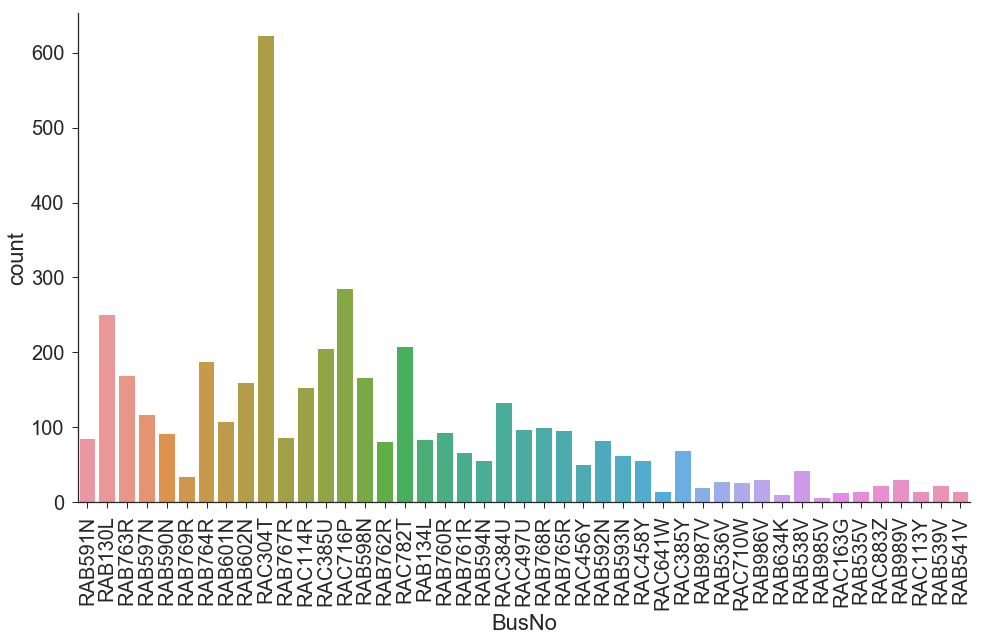

In [447]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 9)
sns.countplot(x= "BusNo",data=RubavuKigalieight)
sns.despine()
fig.savefig('RubavuKigalieight.png')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 2)

# Musanze Rubavu 8am

In [448]:
musanzeRubavu= eight[(eight.Route=='MUSANZE-RUBAVU')]

In [449]:
musanzeRubavu

,TicketNo,Client,Route,Time,Date,Fare,BusNo,BusId,AgentName,TimeStamp
571,681,NaN,MUSANZE-RUBAVU,08h00,2015-05-05,1100,RAC716P,227,ABDOU,"2015-05-05,07:07:58"
615,741,\N,MUSANZE-RUBAVU,08h00,2015-05-05,1100,RAC716P,227,ABDOU,"2015-05-05,07:36:59"
616,742,\N,MUSANZE-RUBAVU,08h00,2015-05-05,1100,RAC716P,227,ABDOU,"2015-05-05,07:37:06"
617,743,\N,MUSANZE-RUBAVU,08h00,2015-05-05,1100,RAC716P,227,ABDOU,"2015-05-05,07:37:10"
618,744,\N,MUSANZE-RUBAVU,08h00,2015-05-05,1100,RAC716P,227,ABDOU,"2015-05-05,07:37:18"
627,758,KAMALI,MUSANZE-RUBAVU,08h00,2015-05-05,1100,RAC716P,227,ABDOU,"2015-05-05,07:41:46"
647,783,NaN,MUSANZE-RUBAVU,08h01,2015-05-05,1100,RAC304T,227,ABDOU,"2015-05-05,07:58:13"
677,817,\N,MUSANZE-RUBAVU,08h30,2015-05-05,1100,RAB590N,227,ABDOU,"2015-05-05,08:18:24"
678,818,\N,MUSANZE-RUBAVU,08h30,2015-05-05,1100,RAB590N,227,ABDOU,"2015-05-05,08:18:37"
680,820,\N,MUSANZE-RUBAVU,08h30,2015-05-05,1100,RAB590N,227,ABDOU,"2015-05-05,08:19:35"
